# pandas基础入门

[Python Data Analytics With Pandas, NumPy, and Matplotlib](https://github.com/Apress/python-data-analytics-2e)

- pandas含有使数据清洗和分析工作变得更快更简单的数据结构和操作工具
- pandas经常和其它工具一同使用，如数值计算工具NumPy和数据可视化库matplotlib
- pandas是 基于NumPy数组构建的，特别是基于数组的函数和不使用for循环的数据处理

虽然pandas采用了大量的NumPy编码风格，但二者最大的不同是pandas是专门为 处理表格和混杂数据设计的。而NumPy更适合处理统一的数值数组数据。

## 本节导航
- 1. pandas的数据结构介绍
- 2. 数据索引 index
- 3. pandas数据操作
- 4. 简单统计计算

- 载入惯例

In [1]:
import pandas as pd  #只要你在代码中看到pd.，就得想到这是pandas

- Series和DataFrame 用的次数非常多，所以将其引入本地命名空间中会更方便

In [2]:
from pandas import Series, DataFrame

# 1、 Pandas的数据结构介绍
- Series（系列）
- DataFrame（数据帧/数据框）

## 1.1 Series

### 1.1.1 初识Series

- Series是一种类似于一维数组的对象，它由一组数据(各种NumPy数据类型)以及 一组与之相关的数据标签(即索引)组成
- Series包含一维数组所有功能和操作
- Series可通过索引标签的方式获取数据，索引具有自动对齐功能

In [4]:
se_1 = pd.Series([4, 7, -5.1, 3]) 
print('se_1:\n',se_1)
print('type of se_1:\n',type(se_1))

se_1:
 0    4.0
1    7.0
2   -5.1
3    3.0
dtype: float64
type of se_1:
 <class 'pandas.core.series.Series'>


- Series的字符串表现形式为:索引在左边，值在右边
- 由于我们没有为数据指定索引，自动创建一个0到N-1(N为数据的长度)的整数型索引
- 可以通过 Series 的values和index属性获取其数组表示形式和索引对象

In [10]:
se_1.values

array([ 4. ,  7. , -5.1,  3. ])

In [8]:
se_1.index

RangeIndex(start=0, stop=4, step=1)

创建Series并带有一个可以对各个数据点进行标记的索引

In [309]:
se_2 = pd.Series([10, 15, 30, 25, 30, 35], index=['一月', '二月', '三月', '四月', '五月','六月'])
se_2

一月    10
二月    15
三月    30
四月    25
五月    30
六月    35
dtype: int64

In [310]:
print(se_2.values)
print(se_2.index)

[10 15 30 25 30 35]
Index(['一月', '二月', '三月', '四月', '五月', '六月'], dtype='object')


In [27]:
import matplotlib.pyplot as plt

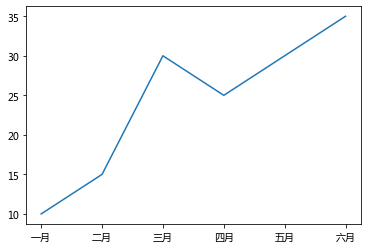

In [28]:
plt.plot(se_2)

### 1.1.2 创建Series

```python
pd.Series(data, index, dtype, copy)
```

In [311]:
help(pd.Series)

Help on class Series in module pandas.core.series:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contains data stored in Series.
 |  
 |      .. versionchanged:: 

- 使用一维数据创建

In [29]:
import numpy as np, pandas as pd

In [33]:
arr_1 = np.arange(10)
print(arr_1)
print(type(arr_1))
print(arr_1.dtype)

[0 1 2 3 4 5 6 7 8 9]
<class 'numpy.ndarray'>
int64


In [34]:
se_1 = pd.Series(arr_1)
print(se_1)
print(type(se_1))

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64
<class 'pandas.core.series.Series'>


- pandas允许我们自定义索引
- 通过字典的方式创建序列

In [313]:
dic_1['a']

10

In [312]:
dic_1 = {'a':10,'b':20,'c':30,'d':40,'e':50}
print(dic_1)
print(type(dic_1))

{'a': 10, 'b': 20, 'c': 30, 'd': 40, 'e': 50}
<class 'dict'>


In [314]:
se_2 = pd.Series(dic_1)
print(se_2)
print(type(se_2))

a    10
b    20
c    30
d    40
e    50
dtype: int64
<class 'pandas.core.series.Series'>


与普通NumPy数组相比，可以通过自定义索引的方式选取Series中的单个或一组值

In [315]:
se_2['a']

10

In [43]:
se_2.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [317]:
se_2[['b','d']] #['b', 'c', 'd']是索引列表

b    20
d    40
dtype: int64

In [50]:
print(dic_1)
print(se_2)

{'a': 10, 'b': 20, 'c': 30, 'd': 40, 'e': 50}
a    10
b    20
c    30
d    40
e    50
dtype: int64


In [318]:
id_se3 = ['a','b','c','f','g']
se_3 = pd.Series(dic_1,index=id_se3)
print(dic_1)
print(se_3)

{'a': 10, 'b': 20, 'c': 30, 'd': 40, 'e': 50}
a    10.0
b    20.0
c    30.0
f     NaN
g     NaN
dtype: float64


In [329]:
type(se_3.values)

numpy.ndarray

NaN:  not a number

- 使用标量
- 需要注明索引

In [321]:
se_4 = pd.Series(5,index=range(3))

In [54]:
print(se_4)

0    5
1    5
2    5
dtype: int64


## 1.2 DataFrame

- DataFrame是一个表格型的数据结构，它含有一组有序的列，每列可以是不同的值 类型(数值、字符串、布尔值等)
- DataFrame既有行索引也有列索引，它可以被 看做由Series组成的字典(共用同一个索引)
- DataFrame中的数据是以一个或多个二维块存放的(而不是列表、字典或别的一维数据结构)

### 1.2.1 DataFrame的创建

In [96]:
help(pd.DataFrame)

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame)
 |  DataFrame(data=None, index: Union[Collection, NoneType] = None, columns: Union[Collection, NoneType] = None, dtype: Union[str, numpy.dtype, ForwardRef('ExtensionDtype'), NoneType] = None, copy: bool = False)
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects.
 |  
 |      .. versionchanged:: 0.23.0
 |         If data is a dict, column order follows insertion-order for
 |         Python 3.6 and later.
 |  
 |      .. versionchanged:: 0.25.0

- 通过二维数组创建

In [325]:
arr = np.array(range(12)).reshape((4,3))
df_1 = pd.DataFrame(arr,index=['id_0','id_1','id_2','id_3'],columns=['c_0','c_1','c_2'])
print('arr:\n',arr)
print('df_1:\n',df_1)
print('type(df_1):\n',type(df_1))
df_1

arr:
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
df_1:
       c_0  c_1  c_2
id_0    0    1    2
id_1    3    4    5
id_2    6    7    8
id_3    9   10   11
type(df_1):
 <class 'pandas.core.frame.DataFrame'>


,c_0,c_1,c_2
id_0,0,1,2
id_1,3,4,5
id_2,6,7,8
id_3,9,10,11


- 通过字典的方式

In [328]:
dic_2 = {'a':[1,2,3,4],'b':['五','六','七','八'],'c':[9.0,10,11.0,12.0],'d':[[13],[14],[15],[16]],'e':[True,False,True,True]}

In [327]:
df_2 = pd.DataFrame(dic_2)
print(df_2)

   a  b     c     d      e
0  1  五   9.0  [13]   True
1  2  六  10.0  [14]  False
2  3  七  11.0  [15]   True
3  4  八  12.0  [16]   True


In [390]:
dic_3 = {'one':{'a':1,'b':2,'c':3,'d':4},'two':{'a':5,'b':6,'c':7,'d':8},'three':{'a':9,'b':10,'c':11,'d':12}}

In [391]:
df_3 = pd.DataFrame(dic_3)
print(df_3)

   one  two  three
a    1    5      9
b    2    6     10
c    3    7     11
d    4    8     12


- 通过数据框的方式

In [392]:
df_4 = df_3[['one','three']]
print(df_4)

   one  three
a    1      9
b    2     10
c    3     11
d    4     12


## 2 数据索引 index

- pandas的索引对象负责管理轴标签和其他元数据(比如轴名称等)
- 构建Series或DataFrame时，所用到的任何数组或其他序列的标签都会被转换成一个Index
- 未定义标签时会自动生成序列标签

In [337]:
print('se_1:\n',se_1,'index of se_1:\n',se_1.index)
print('se_2:\n',se_2,'index of se_2:\n',se_2.index)
print('df_1:\n',df_1,'index of df_1:\n',df_1.index)

se_1:
 a    10
b    15
c    20
d    30
e    55
f    80
dtype: int64 index of se_1:
 Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')
se_2:
 a    10
b    20
c    30
d    40
e    50
dtype: int64 index of se_2:
 Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
df_1:
       c_0  c_1  c_2
id_0    0    1    2
id_1    3    4    5
id_2    6    7    8
id_3    9   10   11 index of df_1:
 Index(['id_0', 'id_1', 'id_2', 'id_3'], dtype='object')


### 2.1 索引的作用

- 获取目标数据

In [339]:
se_0 = pd.Series(range(6))
print('se_0:\n',se_0)
print('index of se_0:\n',se_0.index)

se_0:
 0    0
1    1
2    2
3    3
4    4
5    5
dtype: int64
index of se_0:
 RangeIndex(start=0, stop=6, step=1)


In [344]:
se_0.index=['a','b','c','d','e','f']
print('se_0:\n',se_0)
print('index of se_0:\n',se_0.index)

se_0:
 a    0
b    1
c    2
d    3
e    4
f    5
dtype: int64
index of se_0:
 Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')


有序

In [341]:
print('se_0:\n',se_0)
print('se_0[3]: ',se_0[3])
print('se_0[e]: ',se_0['e'])
print("se_0[[1,3,5]]:\n",se_0[[1,3,5]])
print("se_0[['a','b','d','f']]:\n",se_0[['a','b','d','f']])
print('se_0[:4]: ',se_0[:4])
print("se_0['c':]: ",se_0['c':])
print("se_0['b':'e']: ",se_0['b':'e'])

se_0:
 a    0
b    1
c    2
d    3
e    4
f    5
dtype: int64
se_0[3]:  3
se_0[e]:  4
se_0[[1,3,5]]:
 b    1
d    3
f    5
dtype: int64
se_0[['a','b','d','f']]:
 a    0
b    1
d    3
f    5
dtype: int64
se_0[:4]:  a    0
b    1
c    2
d    3
dtype: int64
se_0['c':]:  c    2
d    3
e    4
f    5
dtype: int64
se_0['b':'e']:  b    1
c    2
d    3
e    4
dtype: int64


注意区别！！！

In [345]:
ls = list(range(6))
se = pd.Series(ls,index=['a','b','c','d','e','f'])
print(ls,'\n',se)

[0, 1, 2, 3, 4, 5] 
 a    0
b    1
c    2
d    3
e    4
f    5
dtype: int64


In [136]:
ls[2:5]

[2, 3, 4]

In [137]:
se[2:5]

c    2
d    3
e    4
dtype: int64

In [139]:
se[5]

5

In [346]:
se['c':'f']

c    2
d    3
e    4
f    5
dtype: int64

通过索引标签获取数据，末端标签所对应的值是可以返回的！

- 使序列或数据框的计算、操作实现自动化对齐

In [347]:
se

a    0
b    1
c    2
d    3
e    4
f    5
dtype: int64

In [350]:
se_id = se.index
print(se_id)

Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')


In [351]:
se_id[0]

'a'

In [352]:
se_id[0] = 'aa'

TypeError: Index does not support mutable operations

### pandas 中Index对象是不可变的，因此用户不能对其进行修改

In [146]:
se_1

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [147]:
se_1.index[0] = 'a'

TypeError: Index does not support mutable operations

### 不可变可以使Index对象在多个数据结构之间安全共享

In [354]:
se_1 = pd.Series(np.array([10,15,20,30,55,80]),index = ['a','b','c','d','e','f'])
print(se_1)

se_2 = pd.Series(np.array([12,11,13,15,14,16]),index = ['a','c','g','b','d','f'])
print(se_2)
print(se_1 + se_2)
print(se_1/se_2)

a    10
b    15
c    20
d    30
e    55
f    80
dtype: int64
a    12
c    11
g    13
b    15
d    14
f    16
dtype: int64
a    22.0
b    30.0
c    31.0
d    44.0
e     NaN
f    96.0
g     NaN
dtype: float64
a    0.833333
b    1.000000
c    1.818182
d    2.142857
e         NaN
f    5.000000
g         NaN
dtype: float64


## 3 pandas数据操作

### 3.1重新索引-reindex

创建一个新对象，它的数据符合 新的索引

In [355]:
se_0 = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b','a', 'c'])
print(se_0)

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64


用该Series的reindex将会根据新索引进行重排。如果某个索引值当前不存在，就引入缺失值.如果减少索引，就相当于一个切片操作.

In [357]:
se_1 = se_0.reindex(['a', 'b', 'c', 'd', 'e'])
print('se_0:\n',se_0)
print('se_1:\n',se_1)

se_0:
 d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64
se_1:
 a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64


In [151]:
print('se_0[0]: ',se_0[0])
print('se_1[0]: ',se_1[0])

se_0[0]:  4.5
se_1[0]:  -5.3


In [157]:
help(_.reindex)

Help on method reindex in module pandas.core.series:

reindex(index=None, **kwargs) method of pandas.core.series.Series instance
    Conform Series to new index with optional filling logic.
    
    Places NA/NaN in locations having no value in the previous index. A new object
    is produced unless the new index is equivalent to the current one and
    ``copy=False``.
    
    Parameters
    ----------
    
    index : array-like, optional
        New labels / index to conform to, should be specified using
        keywords. Preferably an Index object to avoid duplicating data.
    
    method : {None, 'backfill'/'bfill', 'pad'/'ffill', 'nearest'}
        Method to use for filling holes in reindexed DataFrame.
        Please note: this is only applicable to DataFrames/Series with a
        monotonically increasing/decreasing index.
    
        * None (default): don't fill gaps
        * pad / ffill: Propagate last valid observation forward to next
          valid.
        * backfill /

In [358]:
se_2 = se_0.reindex(index=['a', 'b', 'c', 'd', 'e'], fill_value = 10)
print('se_0:\n',se_0)
print('se_1:\n',se_1)
print('se2:\n',se_2)

se_0:
 d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64
se_1:
 a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64
se2:
 a    -5.3
b     7.2
c     3.6
d     4.5
e    10.0
dtype: float64


借助DataFrame，reindex可以修改(行)索引和列。只传递一个序列时，会重新索 引结果的行

In [160]:
df_1

,c_0,c_1,c_2
id_0,0,1,2
id_1,3,4,5
id_2,6,7,8
id_3,9,10,11


In [359]:
df_2 = df_1.reindex(['id_0','id_1','id_3','id_2','a'])
df_2

,c_0,c_1,c_2
id_0,0.0,1.0,2.0
id_1,3.0,4.0,5.0
id_3,9.0,10.0,11.0
id_2,6.0,7.0,8.0
a,NaN,NaN,NaN


列可以用columns关键字重新索引

In [360]:
df_3 = df_1.reindex(columns= ['c_2','c_1','c_0','a'])
df_3

,c_2,c_1,c_0,a
id_0,2,1,0,NaN
id_1,5,4,3,NaN
id_2,8,7,6,NaN
id_3,11,10,9,NaN


### 3.2 丢弃指定轴上的项--drop

drop方法:删除并返回剩余项,不改变对象本身

In [177]:
help(_.drop)

Help on method drop in module pandas.core.frame:

drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise') method of pandas.core.frame.DataFrame instance
    Drop specified labels from rows or columns.
    
    Remove rows or columns by specifying label names and corresponding
    axis, or by specifying directly index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level.
    
    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels from the index (0 or 'index') or
        columns (1 or 'columns').
    index : single label or list-like
        Alternative to specifying axis (``labels, axis=0``
        is equivalent to ``index=labels``).
    
        .. versionadded:: 0.21.0
    columns : single label or list-like
        Alternative to specifying axis (

In [361]:
se_0

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [362]:
se_0_dp = se_0.drop('a')

In [363]:
se_0

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [364]:
se_0_dp

d    4.5
b    7.2
c    3.6
dtype: float64

对于DataFrame，可以删除任意轴上的索引值

In [365]:
df_1

,c_0,c_1,c_2
id_0,0,1,2
id_1,3,4,5
id_2,6,7,8
id_3,9,10,11


In [366]:
df_1.drop('id_0')

,c_0,c_1,c_2
id_1,3,4,5
id_2,6,7,8
id_3,9,10,11


In [367]:
df_1

,c_0,c_1,c_2
id_0,0,1,2
id_1,3,4,5
id_2,6,7,8
id_3,9,10,11


通过传递axis=1或axis='columns'可以删除列的值

In [368]:
df_1.drop('c_1') #axis 默认为0.表示行，因此需要指定列

KeyError: "['c_1'] not found in axis"

In [369]:
df_1.drop('c_1',axis=1) 

,c_0,c_2
id_0,0,2
id_1,3,5
id_2,6,8
id_3,9,11


In [370]:
df_1

,c_0,c_1,c_2
id_0,0,1,2
id_1,3,4,5
id_2,6,7,8
id_3,9,10,11


高危参数：inplace

In [373]:
arr = np.array(range(12)).reshape((4,3))
df_1 = pd.DataFrame(arr,index=['id_0','id_1','id_2','id_3'],columns=['c_0','c_1','c_2'])

In [374]:
df_1

,c_0,c_1,c_2
id_0,0,1,2
id_1,3,4,5
id_2,6,7,8
id_3,9,10,11


In [375]:
df_1.drop('id_0',inplace=True) #没有返回值，直接在原表中删除

In [376]:
df_1

,c_0,c_1,c_2
id_1,3,4,5
id_2,6,7,8
id_3,9,10,11


### 3.3 特定值的选取和过滤

- Series索引的工作方式类似于NumPy数组的索引，只不过Series还可以使用标签进行索引
- 利用标签的切片运算与普通的Python切片运算不同，其末端是包含的
- 用一个值或序列对DataFrame进行索引其实就是获取一个或多个列

### 3.3.1 轴标签(loc)和整数索引(iloc)

In [377]:
arr = np.array(range(12)).reshape((4,3))
df_1 = pd.DataFrame(arr,index=['id_0','id_1','id_2','id_3'],columns=['c_0','c_1','c_2'])
df_1

,c_0,c_1,c_2
id_0,0,1,2
id_1,3,4,5
id_2,6,7,8
id_3,9,10,11


In [205]:
help(_.loc)

Help on _LocIndexer in module pandas.core.indexing object:

class _LocIndexer(_LocationIndexer)
 |  Access a group of rows and columns by label(s) or a boolean array.
 |  
 |  ``.loc[]`` is primarily label based, but may also be used with a
 |  boolean array.
 |  
 |  Allowed inputs are:
 |  
 |  - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
 |    interpreted as a *label* of the index, and **never** as an
 |    integer position along the index).
 |  - A list or array of labels, e.g. ``['a', 'b', 'c']``.
 |  - A slice object with labels, e.g. ``'a':'f'``.
 |  
 |    .. warning:: Note that contrary to usual python slices, **both** the
 |        start and the stop are included
 |  
 |  - A boolean array of the same length as the axis being sliced,
 |    e.g. ``[True, False, True]``.
 |  - A ``callable`` function with one argument (the calling Series or
 |    DataFrame) and that returns valid output for indexing (one of the above)
 |  
 |  See more at :ref:`Selection by Labe

In [378]:
df_1.loc['id_0','c_0']

0

In [211]:
df_1.loc['id_0',['c_0','c_2']]

c_0    0
c_2    2
Name: id_0, dtype: int64

In [212]:
df_1.iloc[0,[0,2]]

c_0    0
c_2    2
Name: id_0, dtype: int64

在pandas中，有多个方法可以选取和重新组合数据

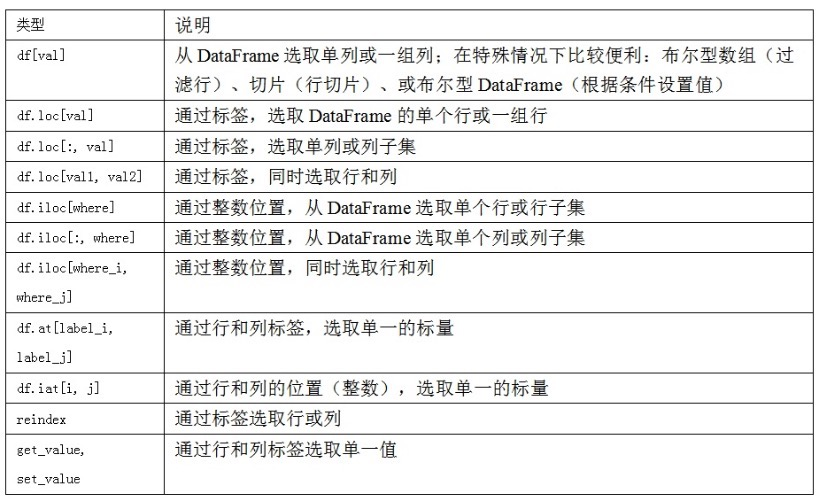

为了进行统一，如果轴索引含有整数，数据选取总会使用标签。为了更准确，请使 用loc(标签)或iloc(整数)

In [379]:
se_1

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [380]:
se_1[-1]

nan

In [381]:
se_0 = pd.Series(range(4))
se_0

0    0
1    1
2    2
3    3
dtype: int64

In [382]:
se_0[-1]

KeyError: -1

### 3.3.2 值填充

特定值

In [383]:
df_1

,c_0,c_1,c_2
id_0,0,1,2
id_1,3,4,5
id_2,6,7,8
id_3,9,10,11


In [384]:
df_1 >4

,c_0,c_1,c_2
id_0,False,False,False
id_1,False,False,True
id_2,True,True,True
id_3,True,True,True


In [385]:
df_1[df_1 >4] = 0
df_1

,c_0,c_1,c_2
id_0,0,1,2
id_1,3,4,0
id_2,0,0,0
id_3,0,0,0


In [228]:
df_1[df_1 == 0] = None
df_1

,c_0,c_1,c_2
id_0,NaN,1.0,2.0
id_1,3.0,4.0,NaN
id_2,NaN,NaN,NaN
id_3,NaN,NaN,NaN


计算值

In [246]:
se_1 = pd.Series(np.array([10,15,20,30,55,80]),index = ['a','b','c','d','e','f'])
print(se_1)

se_2 = pd.Series(np.array([12,11,13,15,14,16]),index = ['a','c','g','b','d','f'])
print(se_2)
print(se_1 + se_2)

a    10
b    15
c    20
d    30
e    55
f    80
dtype: int64
a    12
c    11
g    13
b    15
d    14
f    16
dtype: int64
a    22.0
b    30.0
c    31.0
d    44.0
e     NaN
f    96.0
g     NaN
dtype: float64


In [247]:
se_1.add(se_2,fill_value=0)

a    22.0
b    30.0
c    31.0
d    44.0
e    55.0
f    96.0
g    13.0
dtype: float64

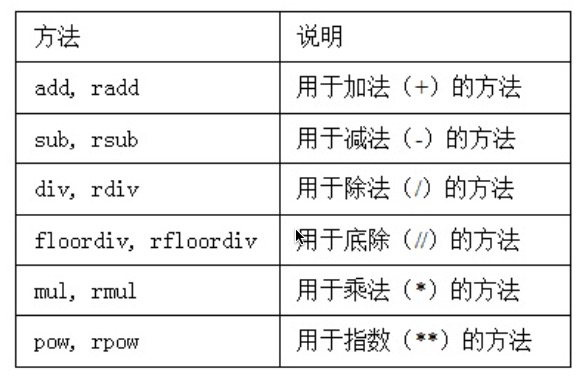

### 3.4 DataFrame和Series之间的运算

思考：不同维度的NumPy数组之间计算，会发生什么？

默认情况下，DataFrame和Series之间的算术运算会将Series的索引匹配到 DataFrame的列，然后沿着行一直向下广播

In [395]:
df_4

,one,three
a,1,9
b,2,10
c,3,11
d,4,12


In [396]:
se_4 = df_4.iloc[0]
se_4

one      1
three    9
Name: a, dtype: int64

In [397]:
se_4 + df_4

,one,three
a,2,18
b,3,19
c,4,20
d,5,21


如果某个索引值在DataFrame的列或Series的索引中找不到，则参与运算的两个对 象就会被重新索引以形成并集

In [399]:
se_5= pd.Series(range(3), index=['b', 'three', 'f'])

In [400]:
se_5 + df_4

,b,f,one,three
a,NaN,NaN,NaN,10.0
b,NaN,NaN,NaN,11.0
c,NaN,NaN,NaN,12.0
d,NaN,NaN,NaN,13.0


如果希望匹配行且在列上广播，则必须使用算术运算方法

In [260]:
df_4

,one,three
a,1,9
b,2,10
c,3,11
d,4,12


In [261]:
se_4  = df_4['one']
se_4

a    1
b    2
c    3
d    4
Name: one, dtype: int64

In [264]:
df_4.add(se_4, axis='index')

,one,three
a,2,10
b,4,12
c,6,14
d,8,16


In [266]:
df_4 + se+4

,a,b,c,d,e,f,one,three
a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.5排序和排名

### 3.5.1 排序

- sort_index

对行或列`索引`进行排序(按字典顺序)，可使用sort_index方法，返回一个已排序的新对象

In [401]:
df_5 = df_4.reindex(['d','b','c','a'])
df_5

,one,three
d,4,12
b,2,10
c,3,11
a,1,9


In [271]:
df_5.sort_index()

,one,three
a,1,9
b,2,10
c,3,11
d,4,12


In [272]:
df_5.sort_index(axis=1)

,one,three
d,4,12
b,2,10
c,3,11
a,1,9


数据默认是按升序排序的，但也可以降序排序

In [275]:
df_5.sort_index(ascending=False)

,one,three
d,4,12
c,3,11
b,2,10
a,1,9


In [276]:
help(_.sort_index)

Help on method sort_index in module pandas.core.frame:

sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, ignore_index: bool = False) method of pandas.core.frame.DataFrame instance
    Sort object by labels (along an axis).
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        The axis along which to sort.  The value 0 identifies the rows,
        and 1 identifies the columns.
    level : int or level name or list of ints or list of level names
        If not None, sort on values in specified index level(s).
    ascending : bool, default True
        Sort ascending vs. descending.
    inplace : bool, default False
        If True, perform operation in-place.
    kind : {'quicksort', 'mergesort', 'heapsort'}, default 'quicksort'
        Choice of sorting algorithm. See also ndarray.np.sort for more
        information.  `mergesort` is the only stable algorithm. For
        Da

- sort_values

对行或列`值`进行排序

In [402]:
df_5

,one,three
d,4,12
b,2,10
c,3,11
a,1,9


In [403]:
se_5 = df_5['one']
se_5

d    4
b    2
c    3
a    1
Name: one, dtype: int64

In [404]:
se_5.sort_values()

a    1
b    2
c    3
d    4
Name: one, dtype: int64

In [282]:
df_5.sort_values(by='one')

,one,three
a,1,9
b,2,10
c,3,11
d,4,12


在排序时，任何缺失值默认都会被放到Series的末尾

In [405]:
df_6 = df_2.reindex(['id_0','id_3','a','id_1','id_2'])
df_6

,c_0,c_1,c_2
id_0,0.0,1.0,2.0
id_3,9.0,10.0,11.0
a,NaN,NaN,NaN
id_1,3.0,4.0,5.0
id_2,6.0,7.0,8.0


In [406]:
df_6.sort_values(by='c_0')

,c_0,c_1,c_2
id_0,0.0,1.0,2.0
id_1,3.0,4.0,5.0
id_2,6.0,7.0,8.0
id_3,9.0,10.0,11.0
a,NaN,NaN,NaN


In [407]:
df_7 = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0 , 1]})
df_7

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [291]:
df_7.sort_values(by=['a','b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


### 3.5.2 排名

排名从1 开始

类比numpy 的 argsort

In [409]:
arr = np.random.randn(5)
print(arr)
print('***********')
arr.argsort()

[ 1.36348151 -0.78110528 -0.46801767  1.22457436 -1.28110828]
***********


array([4, 1, 2, 3, 0])

- rank

默认：为各组分配一个平均排名

In [410]:
se_0 = pd.Series([7, -5, 7, 4, 2, 0, 4])
se_0

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [295]:
se_0.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

根据值在原数据中出现的顺序给出排名

In [297]:
print(se_0)
se_0.rank(method='first')

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64


0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

0和2没有使用平均排名6.5，它们被设成了6和7，因为数据中标签0位于 标签2的前面

按降序进行排名

In [300]:
print(se_0)
se_0.rank(ascending=False)

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64


0    1.5
1    7.0
2    1.5
3    3.5
4    5.0
5    6.0
6    3.5
dtype: float64

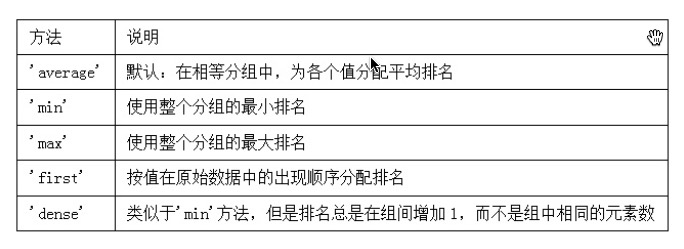

## 4. 简单统计计算

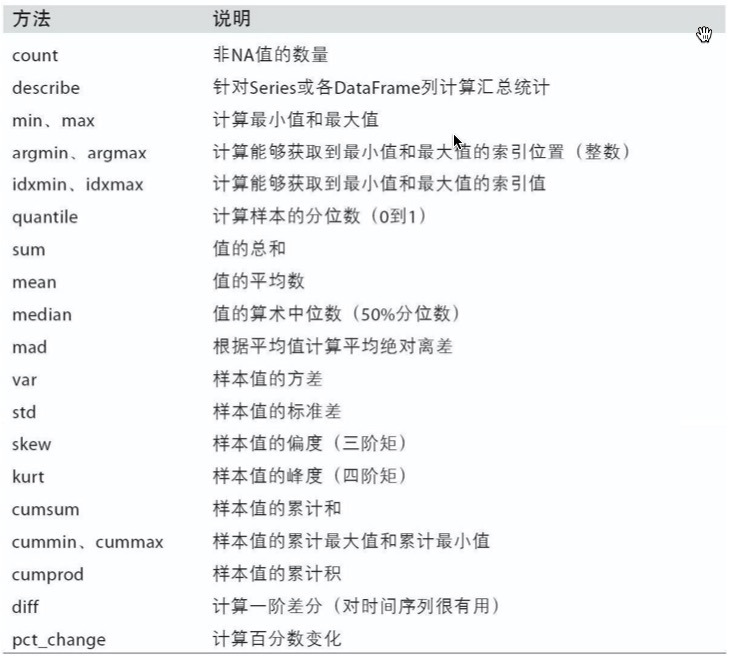

In [411]:
np.random.seed(1234)
d1 = pd.Series(2*np.random.normal(size = 100)+3)
print('d1:\n',d1)
print('非空元素计算: ', d1.count()) #非空元素计算
print('最小值: ', d1.min()) #最小值
print('最大值: ', d1.max()) #最大值
print('最小值的位置: ', d1.idxmin()) #最小值的位置，类似于R中的which.min函数
print('最大值的位置: ', d1.idxmax()) #最大值的位置，类似于R中的which.max函数
print('10%分位数: ', d1.quantile(0.1)) #10%分位数
print('求和: ', d1.sum()) #求和
print('均值: ', d1.mean()) #均值
print('中位数: ', d1.median()) #中位数
print('众数: ', d1.mode()) #众数
print('方差: ', d1.var()) #方差
print('标准差: ', d1.std()) #标准差
print('平均绝对偏差: ', d1.mad()) #平均绝对偏差
print('偏度: ', d1.skew()) #偏度
print('峰度: ', d1.kurt()) #峰度
print('描述性统计指标: ', d1.describe()) #一次性输出多个描述性统计指标

d1:
 0     3.942870
1     0.618049
2     5.865414
3     2.374696
4     1.558823
        ...   
95    2.836106
96    2.310468
97    4.056576
98    0.862022
99    1.976237
Length: 100, dtype: float64
非空元素计算:  100
最小值:  -4.1270333212494705
最大值:  7.781921030926066
最小值的位置:  81
最大值的位置:  39
10%分位数:  0.6870184644069928
求和:  307.0224566250873
均值:  3.070224566250874
中位数:  3.204555266776845
众数:  0    -4.127033
1    -1.800907
2    -1.485370
3    -1.149955
4    -1.042510
        ...   
95    5.865414
96    6.091318
97    7.015686
98    7.061207
99    7.781921
Length: 100, dtype: float64
方差:  4.005609378535085
标准差:  2.0014018533355777
平均绝对偏差:  1.5112880411556109
偏度:  -0.6494780760484293
峰度:  1.2201094052398012
描述性统计指标:  count    100.000000
mean       3.070225
std        2.001402
min       -4.127033
25%        2.040101
50%        3.204555
75%        4.434788
max        7.781921
dtype: float64


In [303]:
def stats(x):
    return pd.Series([x.count(),x.min(),x.idxmin(),x.quantile(.25),x.median(),x.quantile(.75),
                      x.mean(),x.max(),x.idxmax(),x.mad(),x.var(),x.std(),x.skew(),x.kurt()],
                     index = ['Count','Min','Whicn_Min','Q1','Median','Q3','Mean','Max',
                              'Which_Max','Mad','Var','Std','Skew','Kurt'])

In [304]:
stats(d1)

Count        100.000000
Min           -4.127033
Whicn_Min     81.000000
Q1             2.040101
Median         3.204555
Q3             4.434788
Mean           3.070225
Max            7.781921
Which_Max     39.000000
Mad            1.511288
Var            4.005609
Std            2.001402
Skew          -0.649478
Kurt           1.220109
dtype: float64